In [1]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path as path
import math
from scipy.interpolate import griddata

import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

from utility_functions import *

## Read HAZUS Fragility Data

In [2]:
#Define input excitation features other than Sa10
Sa03 = 2.1 #Sa at 0.3 sec in g

#Read Hazus fragility data for plotting purposes
filepath = path.abspath(path.join('hazus_bridge_fragility.csv'))
hazus_fragilities = pd.read_csv(filepath)

In [3]:
hazus_fragilities

,HAZUS_CLASS,median_slight_Sa10,median_moderate_Sa10,median_extensive_Sa10,median_complete_Sa10,beta_slight_Sa10,beta_moderate_Sa10,beta_extensive_Sa10,beta_complete_Sa10,median_slight_pgd,...,median_extensive_pgd,median_complete_pgd,beta_slight_pgd,beta_moderate_pgd,beta_extensive_pgd,beta_complete_pgd,EQ,A,B,I_shape
0,HWB1,0.40,0.50,0.70,0.9,0.6,0.6,0.6,0.6,3.9,...,3.9,13.8,0.2,0.2,0.2,0.2,EQ1,0.25,1,0
1,HWB2,0.60,0.90,1.10,1.7,0.6,0.6,0.6,0.6,3.9,...,3.9,13.8,0.2,0.2,0.2,0.2,EQ1,0.25,1,0
2,HWB3,0.80,1.00,1.20,1.7,0.6,0.6,0.6,0.6,3.9,...,3.9,13.8,0.2,0.2,0.2,0.2,EQ1,0.25,1,1
3,HWB4,0.80,1.00,1.20,1.7,0.6,0.6,0.6,0.6,3.9,...,3.9,13.8,0.2,0.2,0.2,0.2,EQ1,0.25,1,1
4,HWB5,0.25,0.35,0.45,0.7,0.6,0.6,0.6,0.6,3.9,...,3.9,13.8,0.2,0.2,0.2,0.2,EQ1,0.25,1,0
5,HWB6,0.30,0.50,0.60,0.9,0.6,0.6,0.6,0.6,3.9,...,3.9,13.8,0.2,0.2,0.2,0.2,EQ1,0.25,1,0
6,HWB7,0.50,0.80,1.10,1.7,0.6,0.6,0.6,0.6,3.9,...,3.9,13.8,0.2,0.2,0.2,0.2,EQ1,0.25,1,0
7,HWB8,0.35,0.45,0.55,0.8,0.6,0.6,0.6,0.6,3.9,...,3.9,13.8,0.2,0.2,0.2,0.2,EQ2,0.33,0,0
8,HWB9,0.60,0.90,1.30,1.6,0.6,0.6,0.6,0.6,3.9,...,3.9,13.8,0.2,0.2,0.2,0.2,EQ3,0.33,1,0
9,HWB10,0.60,0.90,1.10,1.5,0.6,0.6,0.6,0.6,3.9,...,3.9,13.8,0.2,0.2,0.2,0.2,EQ2,0.33,0,1


## Read NBI Bridge Data for Tennessee

In [4]:
TN_bridges = pd.read_csv('TN_bridges.csv')
TN_bridges

/tmp/ipykernel_8573/2425871662.py:1: DtypeWarning: Columns (75) have mixed types. Specify dtype option on import or set low_memory=False.
  TN_bridges = pd.read_csv('TN_bridges.csv')


,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA
0,47,1TN0311,1,8,0,0,0,0,157,49060,...,Y,5,1100,2037,NaN,Y,73,F,5,68.53
1,47,1TN0312,1,8,0,0,0,0,157,49060,...,Y,5,250,2037,NaN,Y,73,G,7,69.68
2,47,1TN0313,1,8,0,0,0,0,157,49060,...,Y,5,250,2037,NaN,Y,73,F,6,68.64
3,47,1TN0314,1,8,0,0,0,0,157,49060,...,Y,5,250,2037,NaN,Y,73,F,6,68.64
4,47,1023750001,1,5,1,2375,0,1,1,55800,...,Y,8,760,2041,NaN,N,47,F,6,222.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20374,47,DAPFORCAT000042,1,8,0,0,0,0,125,28486,...,Y,6,500,2044,NaN,Y,74,G,7,455.10
20375,47,DAPFORCAT0BR026,1,8,0,0,0,0,125,0,...,Y,8,1000,2044,NaN,Y,74,F,6,92.72
20376,47,DAPFORCAT0BR033,1,8,8,0,0,0,161,0,...,Y,8,300,2044,NaN,Y,74,G,7,107.80
20377,47,DAPFORCAT0BR076,1,8,0,0,0,0,125,28486,...,Y,8,300,2044,NaN,Y,74,G,7,52.56


In [5]:
# Convert column names to lowercase
TN_bridges.columns = TN_bridges.columns.str.lower()

In [6]:
# Function to convert DMS to Decimal Degrees
def dms_to_dd(dms_str, is_longitude=False):
    if is_longitude:
        deg = int(dms_str[:2])  # First three digits for longitude degrees
        dms_str = dms_str[2:]
    else:
        deg = int(dms_str[:2])  # First two digits for latitude degrees
        dms_str = dms_str[2:]
    
    min_ = int(dms_str[:2])  # Next two digits for minutes
    sec = float(dms_str[2:]) / 100  # Convert last part to seconds with decimal

    # Convert to decimal degrees
    dd = deg + (min_ / 60) + (sec / 3600)
    
    return dd

In [7]:
# Apply conversion
TN_bridges['Latitude'] = TN_bridges['lat_016'].astype(str).apply(lambda x: dms_to_dd(x))
TN_bridges['Longitude'] = TN_bridges['long_017'].astype(str).apply(lambda x: dms_to_dd(x, is_longitude=True))

# Ensure longitudes are negative for the Western Hemisphere
TN_bridges['Longitude'] *= -1

In [8]:
TN_bridges = TN_bridges[['state_code_001',
                         'year_built_027',
                         'degrees_skew_034',
                         'structure_kind_043a', 
                         'structure_type_043b',  
                         'main_unit_spans_045', 
                         'max_span_len_mt_048',
                         'structure_len_mt_049',
                         'Latitude', 
                         'Longitude']]
TN_bridges

,state_code_001,year_built_027,degrees_skew_034,structure_kind_043a,structure_type_043b,main_unit_spans_045,max_span_len_mt_048,structure_len_mt_049,Latitude,Longitude
0,47,1942,0,7,2,3,2.7,8.9,35.341336,-89.855197
1,47,1947,0,1,4,1,6.1,6.7,35.335769,-89.867783
2,47,1947,0,1,4,1,6.1,6.6,35.331583,-89.868333
3,47,1947,0,1,4,1,6.1,6.6,35.330222,-89.868250
4,47,1982,0,5,2,2,11.4,24.2,36.051533,-84.339036
...,...,...,...,...,...,...,...,...,...,...
20374,47,2022,0,5,2,1,36.1,37.0,36.595731,-87.629450
20375,47,2012,0,1,19,4,1.2,12.2,36.634639,-87.783750
20376,47,2020,0,1,19,4,2.4,11.0,36.576861,-87.695111
20377,47,1980,45,1,19,2,3.4,7.2,36.578169,-87.545419


In [9]:
TN_bridges = NBI_Defaults(TN_bridges)

In [10]:
# def assign_hazus_classes(row):
#     hazus_class = get_hazus_class(row)
#     bridge_df_hazus = hazus_fragilities.loc[hazus_fragilities['HAZUS_CLASS'] == hazus_class]
#     bridge_df_hazus.reset_index(drop=True, inplace=True)
    
#     #Combine the hazus and NBI data
#     bridge_df = pd.concat([TN_bridges, bridge_df_hazus], axis = 1)
    
#     return bridge_df

## Create a GeoDataFrame Object for Mapping

In [11]:
# Create a GeoDataFrame
TN_bridges_gdf = gpd.GeoDataFrame(TN_bridges, 
                       geometry=gpd.points_from_xy(TN_bridges['Longitude'], 
                                                   TN_bridges['Latitude']),
                       crs="EPSG:4326")  # WGS 84


In [12]:
del TN_bridges

## Create a boundary for Shelby County and filter bridges inside the boundary

In [13]:
# Load the boundary shapefile (e.g., a county or state boundary)
boundary = gpd.read_file("boundary_shapefiles/tl_2019_47157_faces.shp")  # Replace with the actual shapefile path

# Ensure the boundary is in WGS 84 (EPSG:4326)
boundary = boundary.to_crs("EPSG:4326")

# Spatial join: Keep only bridges inside the boundary
Shelby_bridges_gdf = gpd.sjoin(TN_bridges_gdf, boundary[['TFID', 'geometry']], predicate="within")

Shelby_bridges_gdf = Shelby_bridges_gdf.reset_index(drop = True)

In [14]:
Shelby_bridges_gdf

,state_code_001,year_built_027,degrees_skew_034,structure_kind_043a,structure_type_043b,main_unit_spans_045,max_span_len_mt_048,structure_len_mt_049,Latitude,Longitude,geometry,index_right,TFID
0,47,1942,0,7,2,3,2.7,8.9,35.341336,-89.855197,POINT (-89.85520 35.34134),13993,226580048
1,47,1947,0,1,4,1,6.1,6.7,35.335769,-89.867783,POINT (-89.86778 35.33577),13850,205579946
2,47,1947,0,1,4,1,6.1,6.6,35.331583,-89.868333,POINT (-89.86833 35.33158),13846,258761341
3,47,1947,0,1,4,1,6.1,6.6,35.330222,-89.868250,POINT (-89.86825 35.33022),13703,258761335
4,47,2010,45,2,19,2,5.9,11.8,35.196472,-89.956781,POINT (-89.95678 35.19647),20515,259729997
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,47,1970,15,4,2,3,41.8,296.9,35.253083,-90.025611,POINT (-90.02561 35.25308),803,205575826
1072,47,1970,15,4,2,3,41.8,296.9,35.253056,-90.025864,POINT (-90.02586 35.25306),802,224205015
1073,47,1970,0,2,19,2,3.0,7.0,35.295472,-90.020447,POINT (-90.02045 35.29547),17988,205575773
1074,47,1966,45,2,19,2,3.0,7.3,35.263194,-90.027581,POINT (-90.02758 35.26319),11008,265354614


## Plot the Bridge Locations

In [15]:
# # Plot the points
# fig, ax = plt.subplots(figsize=(8, 6))

# Shelby_bridges_gdf = Shelby_bridges_gdf.to_crs(epsg=3857)
# Shelby_bridges_gdf.plot(ax=ax, color='red', markersize=20)

# # Add basemap
# ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=14)
    
# # Title and show plot
# ax.set_title("Bridge Locations in Tennessee (NBI Data)")
# plt.show()

## Get the appropriate fragility parameters based on bridge characteristics

In [16]:
Shelby_bridges_gdf = get_fragilities(Shelby_bridges_gdf, hazus_fragilities)

In [18]:
Shelby_bridges_gdf.columns

Index(['state_code_001', 'year_built_027', 'degrees_skew_034',
       'structure_kind_043a', 'structure_type_043b', 'main_unit_spans_045',
       'max_span_len_mt_048', 'structure_len_mt_049', 'Latitude', 'Longitude',
       'geometry', 'index_right', 'TFID', 'HAZUS_CLASS', 'median_slight_Sa10',
       'median_moderate_Sa10', 'median_extensive_Sa10', 'median_complete_Sa10',
       'beta_slight_Sa10', 'beta_moderate_Sa10', 'beta_extensive_Sa10',
       'beta_complete_Sa10', 'median_slight_pgd', 'median_moderate_pgd',
       'median_extensive_pgd', 'median_complete_pgd', 'beta_slight_pgd',
       'beta_moderate_pgd', 'beta_extensive_pgd', 'beta_complete_pgd', 'EQ',
       'A', 'B', 'I_shape'],
      dtype='object')

## Attach a Hazard Map

### PGA

In [19]:
# Load the .dat file (adjust delimiter if needed)
grid_df = pd.read_csv("2014_pga10pct50yrs.dat", delim_whitespace=True, skiprows = 2, names=["lon", "lat", "hazard"])
grid_pga = gpd.GeoDataFrame(grid_df, geometry=gpd.points_from_xy(grid_df["lon"], grid_df["lat"]), crs="EPSG:4326")

# Spatial join: Keep only bridges inside the boundary
grid_pga = gpd.sjoin(grid_pga, boundary[['TFID', 'geometry']], predicate="within")

grid_pga = grid_pga.reset_index(drop = True)

del grid_df

/tmp/ipykernel_8573/1506686746.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  grid_df = pd.read_csv("2014_pga10pct50yrs.dat", delim_whitespace=True, skiprows = 2, names=["lon", "lat", "hazard"])


### Sa03

In [20]:
# Load the .dat file (adjust delimiter if needed)
grid_df = pd.read_csv("2014_5hz10pct50yrs.dat", delim_whitespace=True, skiprows = 2, names=["lon", "lat", "hazard"])
grid_sa03 = gpd.GeoDataFrame(grid_df, geometry=gpd.points_from_xy(grid_df["lon"], grid_df["lat"]), crs="EPSG:4326")

# Spatial join: Keep only bridges inside the boundary
grid_sa03 = gpd.sjoin(grid_sa03, boundary[['TFID', 'geometry']], predicate="within")

grid_sa03 = grid_sa03.reset_index(drop = True)

del grid_df

/tmp/ipykernel_8573/435993601.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  grid_df = pd.read_csv("2014_5hz10pct50yrs.dat", delim_whitespace=True, skiprows = 2, names=["lon", "lat", "hazard"])


### Sa10

In [21]:
# Load the .dat file (adjust delimiter if needed)
grid_df = pd.read_csv("2014_1hz10pct50yrs.dat", delim_whitespace=True, skiprows = 2, names=["lon", "lat", "hazard"])
grid_sa10 = gpd.GeoDataFrame(grid_df, geometry=gpd.points_from_xy(grid_df["lon"], grid_df["lat"]), crs="EPSG:4326")

# Spatial join: Keep only bridges inside the boundary
grid_sa10 = gpd.sjoin(grid_sa10, boundary[['TFID', 'geometry']], predicate="within")

grid_sa10 = grid_sa10.reset_index(drop = True)

del grid_df

/tmp/ipykernel_8573/1763744199.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  grid_df = pd.read_csv("2014_1hz10pct50yrs.dat", delim_whitespace=True, skiprows = 2, names=["lon", "lat", "hazard"])


In [22]:
# Prepare grid and bridge points
grid_points = np.array(list(zip(grid_pga["lon"], grid_pga["lat"])))
grid_values = grid_pga["hazard"].values
bridge_points = np.array(list(zip(Shelby_bridges_gdf["geometry"].x, Shelby_bridges_gdf["geometry"].y)))

# Interpolate hazard values at bridge locations
Shelby_bridges_gdf["PGA"] = griddata(grid_points, grid_values, bridge_points, method="linear")  # Use "nearest" or "cubic" if needed


In [23]:
# Prepare grid and bridge points
grid_points = np.array(list(zip(grid_sa03["lon"], grid_sa03["lat"])))
grid_values = grid_sa03["hazard"].values
bridge_points = np.array(list(zip(Shelby_bridges_gdf["geometry"].x, Shelby_bridges_gdf["geometry"].y)))

# Interpolate hazard values at bridge locations
Shelby_bridges_gdf["Sa03"] = griddata(grid_points, grid_values, bridge_points, method="linear")  # Use "nearest" or "cubic" if needed


In [24]:
# Prepare grid and bridge points
grid_points = np.array(list(zip(grid_sa10["lon"], grid_sa10["lat"])))
grid_values = grid_sa10["hazard"].values
bridge_points = np.array(list(zip(Shelby_bridges_gdf["geometry"].x, Shelby_bridges_gdf["geometry"].y)))

# Interpolate hazard values at bridge locations
Shelby_bridges_gdf["Sa10"] = griddata(grid_points, grid_values, bridge_points, method="linear")  # Use "nearest" or "cubic" if needed


In [25]:
Shelby_bridges_gdf

,state_code_001,year_built_027,degrees_skew_034,structure_kind_043a,structure_type_043b,main_unit_spans_045,max_span_len_mt_048,structure_len_mt_049,Latitude,Longitude,...,beta_moderate_pgd,beta_extensive_pgd,beta_complete_pgd,EQ,A,B,I_shape,PGA,Sa03,Sa10
0,47,1942,0,7,2,3,2.7,8.9,35.341336,-89.855197,...,0.2,0.2,0.2,NaN,0.00,0,0,0.226614,0.390871,0.095326
1,47,1947,0,1,4,1,6.1,6.7,35.335769,-89.867783,...,0.2,0.2,0.2,EQ1,0.25,1,0,0.227305,0.391894,0.095434
2,47,1947,0,1,4,1,6.1,6.6,35.331583,-89.868333,...,0.2,0.2,0.2,EQ1,0.25,1,0,0.226472,0.390449,0.095149
3,47,1947,0,1,4,1,6.1,6.6,35.330222,-89.868250,...,0.2,0.2,0.2,EQ1,0.25,1,0,0.226182,0.389944,0.095041
4,47,2010,45,2,19,2,5.9,11.8,35.196472,-89.956781,...,0.2,0.2,0.2,NaN,0.00,0,0,0.212889,0.365719,0.089109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,47,1970,15,4,2,3,41.8,296.9,35.253083,-90.025611,...,0.2,0.2,0.2,EQ5,0.05,0,1,0.230637,0.396307,0.095595
1072,47,1970,15,4,2,3,41.8,296.9,35.253056,-90.025864,...,0.2,0.2,0.2,EQ5,0.05,0,1,0.230653,0.396336,0.095602
1073,47,1970,0,2,19,2,3.0,7.0,35.295472,-90.020447,...,0.2,0.2,0.2,NaN,0.00,0,0,0.239660,0.411688,0.098425
1074,47,1966,45,2,19,2,3.0,7.3,35.263194,-90.027581,...,0.2,0.2,0.2,NaN,0.00,0,0,0.233290,0.400805,0.096385


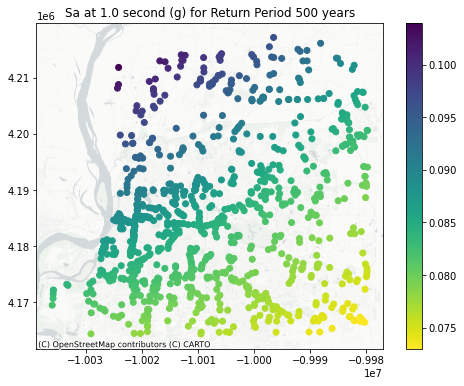

In [26]:
# Plot the points
fig, ax = plt.subplots(figsize=(8, 6))

# Plot using a specific column for colors
Shelby_bridges_gdf = Shelby_bridges_gdf.to_crs(epsg=3857)
Shelby_bridges_gdf.plot(ax=ax, column="Sa10", cmap="viridis_r", legend=True)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=14)
    
# Title and show plot
ax.set_title("Sa at 1.0 second (g) for Return Period 500 years")
plt.show()

In [27]:
# Shelby_bridges_gdf['PGA'] = 0.4
# Shelby_bridges_gdf['Sa03'] = 0.5
# Shelby_bridges_gdf['Sa10'] = 0.7

## Perform Fragility Analysis

In [28]:
# Shelby_bridges_gdf = adjust_fragilities(Shelby_bridges_gdf)

DSs = [1, 2, 3, 4]

# Get probabilities of exceeding each damage state
for ds in DSs:
    Pf = bridge_frag(Shelby_bridges_gdf, ds)
    Shelby_bridges_gdf['prob_exc_ds_{}'.format(ds)] = Pf

In [29]:
Shelby_bridges_gdf

,state_code_001,year_built_027,degrees_skew_034,structure_kind_043a,structure_type_043b,main_unit_spans_045,max_span_len_mt_048,structure_len_mt_049,Latitude,Longitude,...,A,B,I_shape,PGA,Sa03,Sa10,prob_exc_ds_1,prob_exc_ds_2,prob_exc_ds_3,prob_exc_ds_4
0,47,1942,0,7,2,3,2.7,8.9,35.341336,-89.855197,...,0.00,0,0,0.226614,0.390871,0.095326,0.000196,0.000045,0.000012,7.862127e-07
1,47,1947,0,1,4,1,6.1,6.7,35.335769,-89.867783,...,0.25,1,0,0.227305,0.391894,0.095434,0.054242,0.015162,0.004873,4.483486e-04
2,47,1947,0,1,4,1,6.1,6.6,35.331583,-89.868333,...,0.25,1,0,0.226472,0.390449,0.095149,0.053696,0.014973,0.004803,4.404200e-04
3,47,1947,0,1,4,1,6.1,6.6,35.330222,-89.868250,...,0.25,1,0,0.226182,0.389944,0.095041,0.053489,0.014901,0.004777,4.374258e-04
4,47,2010,45,2,19,2,5.9,11.8,35.196472,-89.956781,...,0.00,0,0,0.212889,0.365719,0.089109,0.000127,0.000028,0.000007,4.457092e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,47,1970,15,4,2,3,41.8,296.9,35.253083,-90.025611,...,0.05,0,1,0.230637,0.396307,0.095595,0.000298,0.000298,0.000298,2.334773e-05
1072,47,1970,15,4,2,3,41.8,296.9,35.253056,-90.025864,...,0.05,0,1,0.230653,0.396336,0.095602,0.000298,0.000298,0.000298,2.335954e-05
1073,47,1970,0,2,19,2,3.0,7.0,35.295472,-90.020447,...,0.00,0,0,0.239660,0.411688,0.098425,0.000240,0.000056,0.000015,1.024727e-06
1074,47,1966,45,2,19,2,3.0,7.3,35.263194,-90.027581,...,0.00,0,0,0.233290,0.400805,0.096385,0.000210,0.000048,0.000013,8.618476e-07


In [30]:
# Get probability of each damage state
Shelby_bridges_gdf['prob_ds_0'] = 1 - Shelby_bridges_gdf['prob_exc_ds_1']
for ds in DSs:
    if ds < max(DSs):
        Shelby_bridges_gdf['prob_ds_{}'.format(ds)] = Shelby_bridges_gdf['prob_exc_ds_{}'.format(ds)] - Shelby_bridges_gdf['prob_exc_ds_{}'.format(ds+1)]
    else:
        Shelby_bridges_gdf['prob_ds_{}'.format(ds)] = Shelby_bridges_gdf['prob_exc_ds_{}'.format(ds)]

In [31]:
Shelby_bridges_gdf

,state_code_001,year_built_027,degrees_skew_034,structure_kind_043a,structure_type_043b,main_unit_spans_045,max_span_len_mt_048,structure_len_mt_049,Latitude,Longitude,...,Sa10,prob_exc_ds_1,prob_exc_ds_2,prob_exc_ds_3,prob_exc_ds_4,prob_ds_0,prob_ds_1,prob_ds_2,prob_ds_3,prob_ds_4
0,47,1942,0,7,2,3,2.7,8.9,35.341336,-89.855197,...,0.095326,0.000196,0.000045,0.000012,7.862127e-07,0.999804,0.000151,0.000033,0.000011,7.862127e-07
1,47,1947,0,1,4,1,6.1,6.7,35.335769,-89.867783,...,0.095434,0.054242,0.015162,0.004873,4.483486e-04,0.945758,0.039080,0.010289,0.004425,4.483486e-04
2,47,1947,0,1,4,1,6.1,6.6,35.331583,-89.868333,...,0.095149,0.053696,0.014973,0.004803,4.404200e-04,0.946304,0.038724,0.010169,0.004363,4.404200e-04
3,47,1947,0,1,4,1,6.1,6.6,35.330222,-89.868250,...,0.095041,0.053489,0.014901,0.004777,4.374258e-04,0.946511,0.038588,0.010124,0.004340,4.374258e-04
4,47,2010,45,2,19,2,5.9,11.8,35.196472,-89.956781,...,0.089109,0.000127,0.000028,0.000007,4.457092e-07,0.999873,0.000099,0.000021,0.000007,4.457092e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,47,1970,15,4,2,3,41.8,296.9,35.253083,-90.025611,...,0.095595,0.000298,0.000298,0.000298,2.334773e-05,0.999702,0.000000,0.000000,0.000275,2.334773e-05
1072,47,1970,15,4,2,3,41.8,296.9,35.253056,-90.025864,...,0.095602,0.000298,0.000298,0.000298,2.335954e-05,0.999702,0.000000,0.000000,0.000275,2.335954e-05
1073,47,1970,0,2,19,2,3.0,7.0,35.295472,-90.020447,...,0.098425,0.000240,0.000056,0.000015,1.024727e-06,0.999760,0.000184,0.000040,0.000014,1.024727e-06
1074,47,1966,45,2,19,2,3.0,7.3,35.263194,-90.027581,...,0.096385,0.000210,0.000048,0.000013,8.618476e-07,0.999790,0.000162,0.000035,0.000012,8.618476e-07


## Plot the Damage States

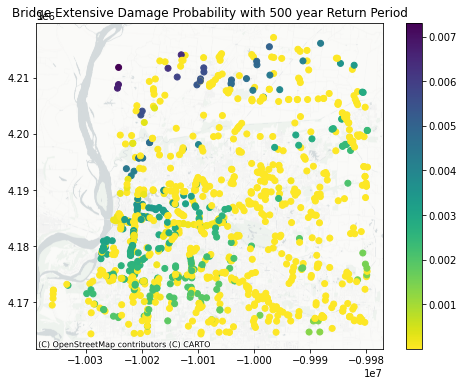

In [32]:
# Plot the points
fig, ax = plt.subplots(figsize=(8, 6))

# Plot using a specific column for colors
Shelby_bridges_gdf.plot(ax=ax, column="prob_exc_ds_3", cmap="viridis_r", legend=True)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=14)
    
# Title and show plot
ax.set_title("Bridge Extensive Damage Probability with 500 year Return Period")
plt.show()

## Consequence Analysis - Damage Ratios

In [33]:
DRs = [0.0, 0.1, 0.4, 0.7, 1.0]

Shelby_bridges_gdf['Damage_Ratio'] = 0.0

for ds in [0, 1, 2, 3, 4]:
    Shelby_bridges_gdf['Damage_Ratio'] += DRs[ds] * Shelby_bridges_gdf['prob_ds_{}'.format(ds)]

In [34]:
Shelby_bridges_gdf

,state_code_001,year_built_027,degrees_skew_034,structure_kind_043a,structure_type_043b,main_unit_spans_045,max_span_len_mt_048,structure_len_mt_049,Latitude,Longitude,...,prob_exc_ds_1,prob_exc_ds_2,prob_exc_ds_3,prob_exc_ds_4,prob_ds_0,prob_ds_1,prob_ds_2,prob_ds_3,prob_ds_4,Damage_Ratio
0,47,1942,0,7,2,3,2.7,8.9,35.341336,-89.855197,...,0.000196,0.000045,0.000012,7.862127e-07,0.999804,0.000151,0.000033,0.000011,7.862127e-07,0.000037
1,47,1947,0,1,4,1,6.1,6.7,35.335769,-89.867783,...,0.054242,0.015162,0.004873,4.483486e-04,0.945758,0.039080,0.010289,0.004425,4.483486e-04,0.011569
2,47,1947,0,1,4,1,6.1,6.6,35.331583,-89.868333,...,0.053696,0.014973,0.004803,4.404200e-04,0.946304,0.038724,0.010169,0.004363,4.404200e-04,0.011435
3,47,1947,0,1,4,1,6.1,6.6,35.330222,-89.868250,...,0.053489,0.014901,0.004777,4.374258e-04,0.946511,0.038588,0.010124,0.004340,4.374258e-04,0.011384
4,47,2010,45,2,19,2,5.9,11.8,35.196472,-89.956781,...,0.000127,0.000028,0.000007,4.457092e-07,0.999873,0.000099,0.000021,0.000007,4.457092e-07,0.000023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,47,1970,15,4,2,3,41.8,296.9,35.253083,-90.025611,...,0.000298,0.000298,0.000298,2.334773e-05,0.999702,0.000000,0.000000,0.000275,2.334773e-05,0.000216
1072,47,1970,15,4,2,3,41.8,296.9,35.253056,-90.025864,...,0.000298,0.000298,0.000298,2.335954e-05,0.999702,0.000000,0.000000,0.000275,2.335954e-05,0.000216
1073,47,1970,0,2,19,2,3.0,7.0,35.295472,-90.020447,...,0.000240,0.000056,0.000015,1.024727e-06,0.999760,0.000184,0.000040,0.000014,1.024727e-06,0.000046
1074,47,1966,45,2,19,2,3.0,7.3,35.263194,-90.027581,...,0.000210,0.000048,0.000013,8.618476e-07,0.999790,0.000162,0.000035,0.000012,8.618476e-07,0.000040


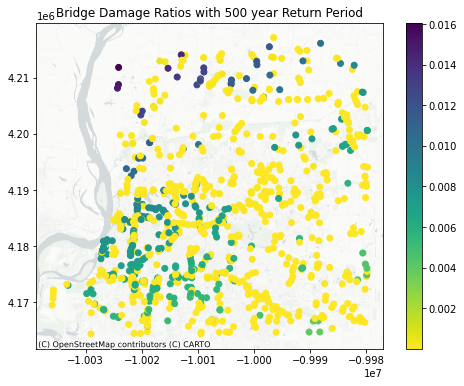

In [35]:
# Plot the points
fig, ax = plt.subplots(figsize=(8, 6))

# Plot using a specific column for colors
Shelby_bridges_gdf.plot(ax=ax, column="Damage_Ratio", cmap="viridis_r", legend=True)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=14)
    
# Title and show plot
ax.set_title("Bridge Damage Ratios with 500 year Return Period")
plt.show()

## Aggregate Consequence Metrics

In [36]:
Shelby_bridges_DR = Shelby_bridges_gdf[['HAZUS_CLASS', 'Sa10', 'Damage_Ratio']]

Shelby_bridges_DR_grouped = Shelby_bridges_DR.groupby('HAZUS_CLASS').mean()
Shelby_bridges_DR_grouped

,Sa10,Damage_Ratio
HAZUS_CLASS,,
HWB10,0.085043,0.000075
HWB11,0.080487,0.000014
HWB12,0.084124,0.007149
HWB14,0.081321,0.000148
HWB15,0.086041,0.000115
HWB16,0.082256,0.000017
HWB17,0.084936,0.007345
HWB19,0.085209,0.000204
HWB22,0.086319,0.000085


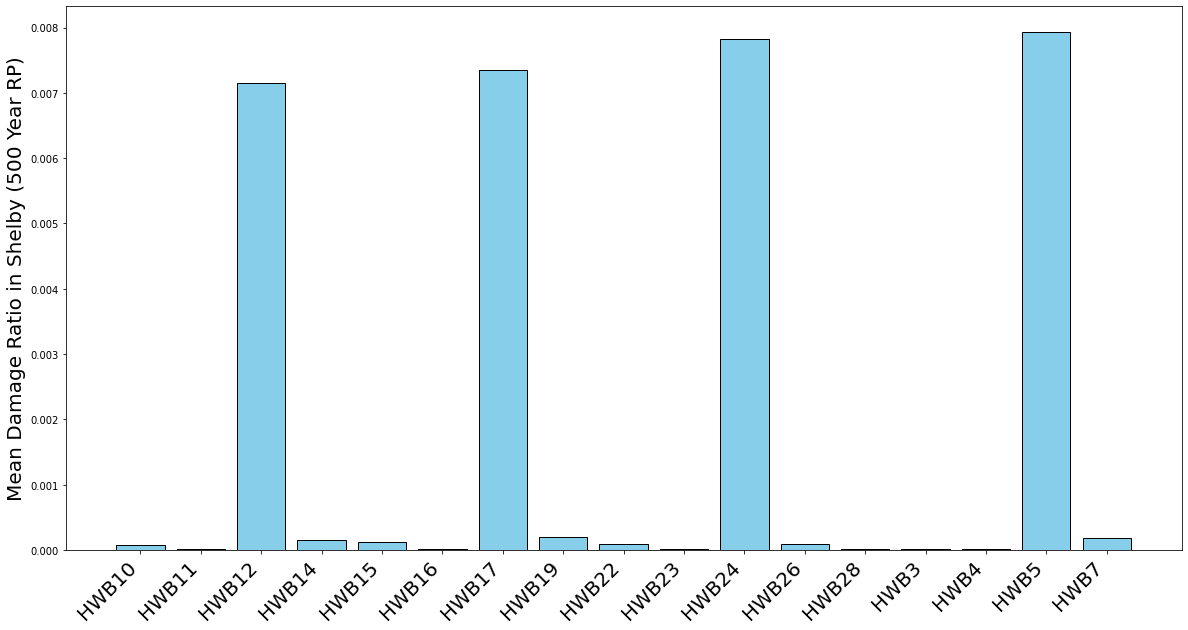

In [37]:
# Create a bar chart
plt.figure(figsize=(20, 10))
plt.bar(Shelby_bridges_DR_grouped.index, Shelby_bridges_DR_grouped["Damage_Ratio"], 
        color="skyblue", edgecolor="black")

# Customize the chart
# plt.xlabel("HAZUS Class", fontsize = 50)
plt.ylabel("Mean Damage Ratio in Shelby (500 Year RP)", fontsize = 20)
plt.xticks(rotation=45, fontsize = 20, ha="right")  # Rotate 45 degrees with right alignment
# plt.title("Bar Chart of Values by Category")
plt.show()